# Dimensionality reduction in Hyperspectral Images (HSI)

In [ ]:
data_directory = './data'

In [41]:
# Parameters
dataset = 'IP'
decomp_func = 'svd'
num_channels = None

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#!pip install spectral
import spectral
from sklearn.decomposition import FactorAnalysis, NMF
from sklearn.decomposition import PCA, TruncatedSVD

In [ ]:
os.makedirs(data_directory', exist_ok=True)


In [3]:
def readData(dataset, data_path='../SpectralNET/data'):
    data_dict = {
        'IP': ('Indian_pines_corrected.mat', 'indian_pines_corrected', 'Indian_pines_gt.mat', 'indian_pines_gt'),
        'SA': ('Salinas_corrected.mat', 'salinas_corrected', 'Salinas_gt.mat', 'salinas_gt'),
        'PU': ('PaviaU.mat', 'paviaU', 'PaviaU_gt.mat', 'paviaU_gt')
    }
    (X_1, X_2, y_1, y_2) = data_dict.get(dataset[0:2].upper())
    X = sio.loadmat(os.path.join(data_path, X_1))[X_2]
    y = sio.loadmat(os.path.join(data_path, y_1))[y_2]
    
    return (X, y)


In [4]:
# Dimensionality reduction algorithms
def applyPCA(X, numComponents=75, random_state=0):
    newX = np.reshape(X, (-1, X.shape[2])) # Reshape to columns for each band
    pca = PCA(n_components=numComponents, whiten=True, random_state=random_state)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

def applyFA(X, numComponents=75, random_state=0):
    newX = np.reshape(X, (-1, X.shape[2])) # Reshape to columns for each band
    fa = FactorAnalysis(n_components=numComponents, random_state=random_state)
    newX = fa.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, fa

def applySVD(X, numComponents=75, random_state=0):
    newX = np.reshape(X, (-1, X.shape[2])) # Reshape to columns for each band
    svd = TruncatedSVD(n_components=numComponents, random_state=random_state)
    newX = svd.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, svd

def applyNMF(X, numComponents=75, random_state=0):
    newX = np.reshape(X, (-1, X.shape[2])) # Reshape to columns for each band
    nmf = NMF(n_components=numComponents, random_state=random_state)
    newX = nmf.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, nmf

def applyNone(X, numComponents=75, random_state=0):
    return X, 'None'



In [5]:
dict_reduction={
    'fa' : (lambda X, numComponents: applyFA(X, numComponents=numComponents)),
    'nmf' : (lambda X, numComponents: applyNMF(X, numComponents=numComponents)),
    'pca': (lambda X, numComponents: applyPCA(X, numComponents=numComponents)),
    'svd': (lambda X, numComponents: applySVD(X, numComponents=numComponents)),
    'none': (lambda X, numComponents: applyNone(X, numComponents=numComponents))
}

DimReduction=dict_reduction.get(decomp_func)

In [6]:
HSI, HSI_y = readData(dataset[0:2])

HSI.shape, HSI_y.shape

((145, 145, 200), (145, 145))

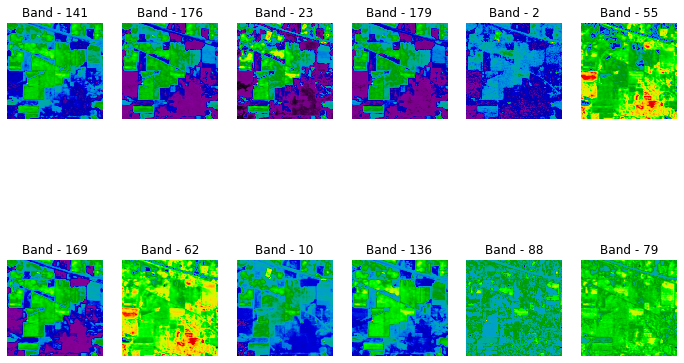

In [39]:
fig = plt.figure(figsize = (12, 8))

for i in range(1, 1+12):
    fig.add_subplot(2,6, i)
    band = np.random.randint(HSI.shape[2])
    plt.imshow(HSI[:,:,band], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {band}')

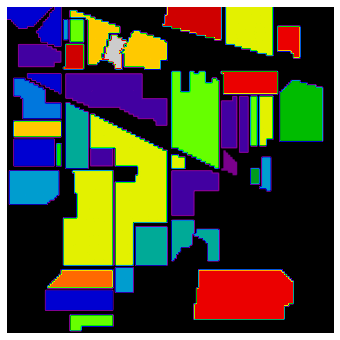

In [40]:
plt.figure(figsize=(6, 6))
plt.imshow(HSI_y, cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [42]:
if (num_channels is None):
    num_channels = HSI.shape[2]
DRI, dim_r = DimReduction(HSI, numComponents=num_channels)

num_channels = DRI.shape[2]
DRI.shape

(145, 145, 200)

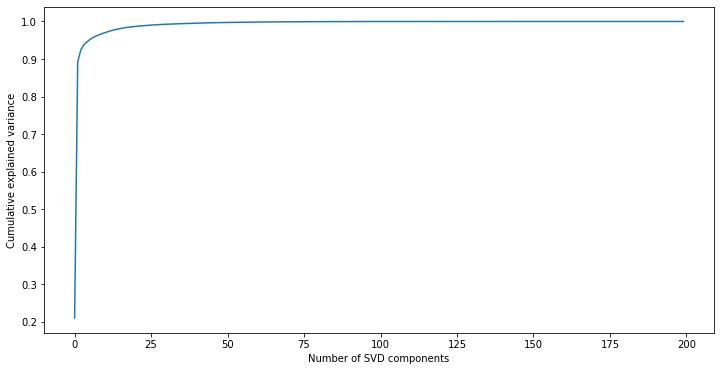

In [43]:
# For PCA & SVD
ev=dim_r.explained_variance_ratio_
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel(f'Number of {decomp_func.upper()} components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [44]:
for (a, b) in zip(range(1, len(ev)+1), np.cumsum(ev)):
    print(f'{a:3d}: ',f'{b:.5f}')

  1:  0.21008
  2:  0.89173
  3:  0.92385
  4:  0.93757
  5:  0.94526
  6:  0.95205
  7:  0.95722
  8:  0.96103
  9:  0.96461
 10:  0.96756
 11:  0.97047
 12:  0.97302
 13:  0.97550
 14:  0.97775
 15:  0.97962
 16:  0.98119
 17:  0.98274
 18:  0.98410
 19:  0.98510
 20:  0.98603
 21:  0.98690
 22:  0.98774
 23:  0.98845
 24:  0.98912
 25:  0.98975
 26:  0.99036
 27:  0.99091
 28:  0.99143
 29:  0.99186
 30:  0.99225
 31:  0.99262
 32:  0.99297
 33:  0.99331
 34:  0.99364
 35:  0.99394
 36:  0.99424
 37:  0.99452
 38:  0.99479
 39:  0.99506
 40:  0.99532
 41:  0.99557
 42:  0.99581
 43:  0.99604
 44:  0.99624
 45:  0.99643
 46:  0.99661
 47:  0.99678
 48:  0.99693
 49:  0.99708
 50:  0.99721
 51:  0.99735
 52:  0.99748
 53:  0.99760
 54:  0.99772
 55:  0.99785
 56:  0.99796
 57:  0.99807
 58:  0.99818
 59:  0.99828
 60:  0.99837
 61:  0.99846
 62:  0.99854
 63:  0.99862
 64:  0.99870
 65:  0.99877
 66:  0.99884
 67:  0.99890
 68:  0.99896
 69:  0.99902
 70:  0.99907
 71:  0.99912
 72:  

In [ ]:
# for NMF
re = dim_r.reconstruction_err_
re

'Value is None'

 $\LaTeX$ example $a_i^2$

65